# Nonlinear optimization - 2022.2

## Optimum power for a set of $m$ lamps illuminating a set of $n$ flat patches to best approach a target illumination

Consider $m$ lamps illuminating $n$ (small flat) patches. The illumination intensity $I_k$ at the $k$-th patch depends linearly on the lamp powers $p_j$ as:
$$
I_k = \sum\limits_{j=1}^m a_{k,j}p_j, \quad \text{with} \quad a_{k,j} = \dfrac{\max\{\cos(\theta_{k,j}), 0\}}{r^{2}_{k,j}},
$$
where $r_{k,j}$ is the length of the vector $\mathbf{r}_{k,j}$ connecting the center of the $k$-th patch to the position of the $j$-th lamp and $\theta_{k,j}$ is the angle between the patch normal vector $\mathbf{n}_{k}$ and $\mathbf{r}_{k,j}$. See the Convex Optimization book slides for more details.

The proposed problem is to achieve a desired illumination $I_{des}$ with bounded lamp powers ($p_{max}$), i.e.,
$$
\begin{align*}
    & \min{\underset{k=1, 2, \ldots, n}{\max}\vert \log(I_k) - \log(I_{des})\vert} \\
    \text{s. t.}\quad & 0 \leq p_j \leq p_{max}, j = 1, 2, \ldots, m.
\end{align*}
$$

### Suboptimally solve the problem using, e.g., Matlab, according to the following approaches:

1. Using uniform power, i.e., $p_j = p, 0 \leq p \leq p_{max}$.
2. Using least-squares, i.e., $ \min. \sum\limits_{k=1}^n (I_k - I_{des})^2$, and rounding $p_j$ as $p_j = \max\{0, \min\{p_j, p_{max}\}\}$.
3. Using weighted least-squares, i.e., $ \min. \sum\limits_{k=1}^n (I_k - I_{des})^2 + \sum\limits_{k=1}^n w_j (p_j - p_{max})^2$ and iteratively adjusting the weights $w_j$ until $0 \leq p \leq p_{max}, \forall j$.
4. Using linear programming, i.e., 
$$
\begin{align*}
    & \min{\underset{k=1, 2, \ldots, n}{\max}\vert I_k - I_{des}\vert} \\
    \text{s. t.}\quad & 0 \leq p_j \leq p_{max}, j = 1, 2, \ldots, m.
\end{align*}
$$

In [2]:
clc;
close all;

showFig = true;
numLamps = 4;
numPatches = 5;
maxPwr = 1;
desiredillum = 0.01;

% Code for random generation
% rng(20222);
% lampPos = repmat([0.5 6], numLamps, 1) + 3*rand(numLamps, 2);
% lampPos(1:end, 1) = cumsum(lampPos(:, 1));
% patchPos = repmat([0 2], numPatches+1, 1) + 2*rand(numPatches+1, 2);
% patchPos(1:end, 1) = cumsum(patchPos(:, 1));
% lampPos(:, 1) = lampPos(:, 1) + patchPos(1, 1);

lampPos = [0.6838 7.8976; 3.1835 7.0690; 5.5327 6.6806; 6.1963 6.5203];
patchPos = [0.0762 2.8621; 1.4506 2.8733; 2.5122 2.5864; 4.2246 3.5846; 5.3512 2.1960; 6.3013 2.9838];

lampPos = complex(lampPos(:,1), lampPos(:,2));
patchPos = complex(patchPos(:,1), patchPos(:,2));
patchCenter = (patchPos(1:end-1) + patchPos(2:end))/2;
patchNorm = patchPos(2:end) - patchPos(1:end-1);
minPatchLength = min(abs(patchNorm))/2;
for p = 1:length(patchNorm)
    n = null([real(patchNorm(p)) imag(patchNorm(p))]);
    patchNorm(p) = minPatchLength*complex(n(1), n(2));
end

if showFig == true
    plot(lampPos, 'ro', 'MarkerFaceColor', 'auto');
    hold on;
    plot(patchPos, 'bo-', 'MarkerFaceColor', 'auto');
    plot(patchCenter, 'mx', 'MarkerFaceColor', 'auto');
    plot(patchNorm + patchCenter, 'kd', 'MarkerFaceColor', 'auto');
    for i=1:length(patchCenter),
        plot([patchCenter(i) patchNorm(i) + patchCenter(i)], 'k--', 'MarkerFaceColor', 'auto');
    end
    axis equal;
end
ylabel('y');
xlabel('x');

radDist = zeros(length(patchCenter), length(lampPos));
angShift = zeros(length(patchCenter), length(lampPos));
for i = 1:length(patchCenter)
    for j = 1:length(lampPos)
        radDist(i, j) = abs(patchCenter(i) - lampPos(j));
        angShift(i, j) = angle(lampPos(j)-patchCenter(i))-angle(patchNorm(i));
    end
end

illumCoeff = radDist.^(-2).*max(cos(angShift), 0);
save -mat7-binary 'lamp.mat' illumCoeff desiredillum;

UndefVarError: UndefVarError: clc not defined

### Suboptimally solve the problem using, e.g., Matlab, according to the following approaches:

1. Using uniform power, i.e., $p_j = p, 0 \leq p \leq p_{max}$.
2. Using least-squares, i.e., $ \min. \sum\limits_{k=1}^n (I_k - I_{des})^2$, and rounding $p_j$ as $p_j = \max\{0, \min\{p_j, p_{max}\}\}$.
3. Using weighted least-squares, i.e., $ \min. \sum\limits_{k=1}^n (I_k - I_{des})^2 + \sum\limits_{k=1}^n w_j (p_j - p_{max})^2$ and iteratively adjusting the weights $w_j$ until $0 \leq p \leq p_{max}, \forall j$.
4. Using linear programming, i.e., 
$$
\begin{align*}
    & \min. \underset{k=1, 2, \ldots, n}{\max}\vert I_k - I_{des}\vert \\
    \text{s. t.}\quad & 0 \leq p_j \leq p_{max}, j = 1, 2, \ldots, m.
\end{align*}
$$

---

# Answer

## General approaches of convex analyses
- Assume that the objective function of convex and proceed.
    - It may lead to errors.
- Verify whether the problem is convex or not
    - The basic approach is the first- and second-order conditions.
    - It usually leads to complicated analysis.
- Construct the problem as convex from the DCP ruleset and a "atom library", which is a set of basic functions that preserve convexity/concavity.
    - It is restricted to the atom library and DCP ruleset, but the convexity verification is automatic.
    - It usually involves adding auxiliary variables and reformulating the original optimization problem in order to get an expression that obeys the CDP ruleset.
    - The manipulation of the original problem by using operations that preserve the convexity/concavity is called convex calculus.
    - The reformulation usually leads to a new optimization problem that is not equal to the original one. However, they are equivalents in the sense that if your find the solve the reformulated problem, then you also find the solution to the original problem.

## 1. Using uniform power

For the first method, we have that $p_j = p$ for $j \in \{1, 2, \cdots, m\}$. Therefore, the optimization problem becomes

$$
\begin{align*}
        \text{Minimize } & f_0(p) = \underset{k=1, 2, \ldots, n}{\max}\left| \log\left(\frac{a_{k}}{I_{des}} p\right)\right|
\end{align*}
$$
where $a_{k} = \sum\limits_{j=1}^m a_{k,j}$.

#### Curvature analysis of $f_0(p)$
- The function $s_1(p) = (a_{k}/I_{des}) p$ is a nonnegative scaling, provided that $a_{k}/I_{des} > 0$, and affine (more precisely, linear).
- The function $s_2(x) = \log (x)$ is concave and nondecreasing. Hence, by the composite function properties, $s_3 = s_2 \circ s_1$ is concave as well.
- In order to apply the composite function properties again, $s_4(x) = \mid x \mid$ would have to be nondecreasing or nonincreasing during its whole domain. Since it is nondecreasing for $x>0$ and nonincreasing for $x<0$, we cannot state that $s_4 \circ s_3$ is convex or concave. Hence, `Convex.jl` warns it as a nonDPC-compliant.

In [3]:
using Convex
p = Variable()

f = abs(log(p))

abs (Convex.NotDcp; positive)
└─ log (concave; real)
   └─ real variable (id: 115…247)

┌ Warning: Expression not DCP compliant. Trying to solve non-DCP compliant problems can lead to unexpected behavior.
└ @ Convex /home/tapyu/.julia/packages/Convex/ukggP/src/dcp.jl:25


Indeed, this function is nonconvex and nonconcave

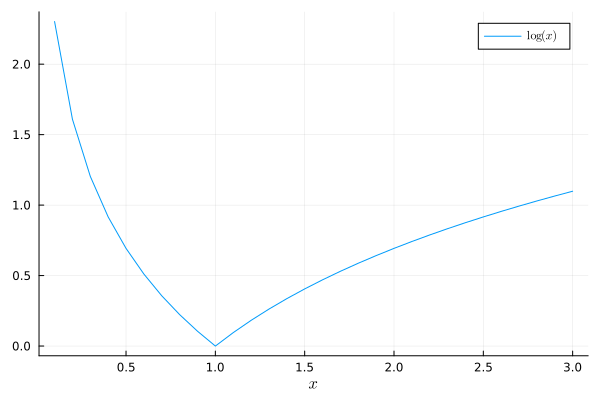

In [4]:
using Plots, LaTeXStrings

x = .1:.1:3

plot(x, abs.(log.(x)), label=L"\log(x)", xlabel=L"x")

However, note that this optimization problem is equivalent to the solve

$$
\begin{align*}
        \text{Minimize } & g_0(p) = \underset{k=1, 2, \ldots, n}{\max}\left| p - \frac{I_{des}}{a_{k}}\right|
\end{align*}
$$
which is clearly a convex function since the $\max$ of a series of convex functions is convex.

In [5]:
using MAT, Convex, SCS
file = matopen("lamp.mat") # open .mat file on Julia

𝐀, I_des = read(file, "illumCoeff", "desiredillum") # matrix of the coefficients aⱼₖ
p = Variable() # uniform lamp power

𝐚 = vec(sum(𝐀, dims=1))
f = maximum(abs.(p .- (I_des./𝐚))) # objective function
problem = minimize(f)

solve!(problem, SCS.Optimizer)
println("Objective function solution: ", round(problem.optval, digits = 4))
println("Optimum value of the optimization variable: ", round.(evaluate(p), digits = 4))

Objective function solution: 0.0154
Optimum value of the optimization variable: 0.067
------------------------------------------------------------------
	       SCS v3.2.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 9, constraints m: 15
cones: 	  z: primal zero / dual free vars: 1
	  l: linear vars: 14
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 30, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0| 1.55e+01  1.00e+00  2.32e+01 -1.16e+01  1.00e-01  1.60e-03 
   250| 1.58e-05  4.2

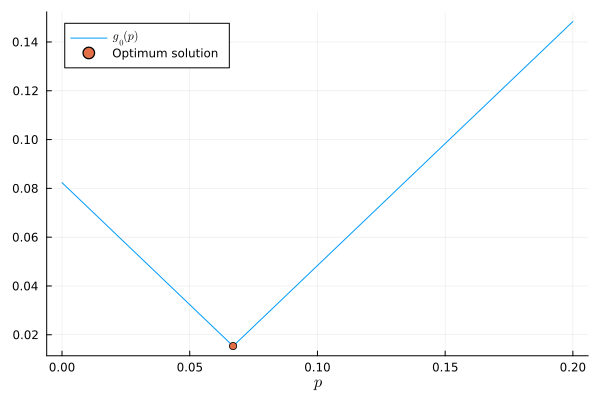

In [6]:
g(x) = maximum(abs.(x .- (I_des./𝐚)))
plot(g, 0, 0.2, label=L"g_0(p)", xlabel=L"p")
scatter!([p.value], [g(p.value)], label="Optimum solution", legend=:topleft)

Being equivalent means that, if you solve the reformulated problem, then you also find the first solution

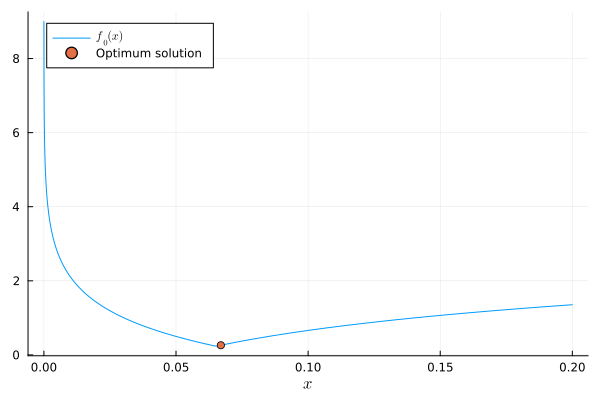

In [7]:
f0(x) = maximum(abs.(log.((𝐚.*x)./I_des)))
plot(f0, 0, 0.2, label=L"f_0(x)", xlabel=L"x")
scatter!([p.value], [f0(p.value)], label="Optimum solution", legend=:topleft)

## Using least-squares

By using matrix notation, the least-squares problem is identical to
$$
\begin{align*}
    \text{Minimize} & \;\; \| \mathbf{A}\mathbf{p} - I_{des}\|^2\\
    \text{s. t.}\quad & -\mathbf{p} \preceq 0,  \mathbf{p} \preceq p_{max}
\end{align*}
$$

where, $\mathbf{p} = (p_1, p_2, \dots, p_J)$, $\left[\mathbf{A}\right]_{kj} = a_{kj}$, $\min(\mathbf{x})$ is the minimum element value of the vector $\mathbf{x}$, and $J$ the total number of paths.

#### Curvature analysis
1. $s_1(\mathbf{p}) = \mathbf{A}\mathbf{p} - I_{des}$ is an affine vector- valued function. It means that, if $s_1 = (s_{11}, s_{12}, \dots, s_{1K})$, where $s_{1k}(\mathbf{p})$ is the mapping function of $k$-patch and $K$ is the total number of patches, then $\left\{s_{1k}\right\}_{k=1}^{K}$ is a set of affine functions.
2. If $s_2(\mathbf{x}) = \|\mathbf{x}\|$, then $s_3 = s_2 \circ s_1$ is convex since $\left\{s_{1k}\right\}_{k=1}^{K}$ is a set of concave functions when $s_2$ is nonincreasing and $\left\{s_{1k}\right\}_{k=1}^{K}$ is is a set of convex functions when $s_2$ is nondecresing (affine functions are both convex and concave).
3. Let us define $s_4(x) = x^2$. Once $s_3$ is convex and positive-valued, and $s_4$ is convex nondecreasing for positive values, the composition property guarantees that $s_5 = s_4 \circ s_3$ is also convex.

In [25]:
# 𝐀 -> [k x j]
𝐩 = Variable(size(𝐀, 2))
pₘₐₓ = 1

f = square(norm(𝐀*𝐩 - I_des))
problem = minimize(f)
problem.constraints += -𝐩 < 0
problem.constraints +=  𝐩 < pₘₐₓ
solve!(problem, SCS.Optimizer)
println("Objective function solution: ", problem.optval)
println("Optimum value of the optimization variable: ", round.(evaluate(𝐩), digits = 4))

Objective function solution: 2.446096366617377e-6
Optimum value of the optimization variable: [0.1477, 0.0277, 0.0642, 0.0945]
------------------------------------------------------------------
	       SCS v3.2.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
------------------------------------------------------------------
problem:  variables n: 7, constraints m: 19
cones: 	  z: primal zero / dual free vars: 1
	  l: linear vars: 9
	  q: soc vars: 9, qsize: 2
settings: eps_abs: 1.0e-04, eps_rel: 1.0e-04, eps_infeas: 1.0e-07
	  alpha: 1.50, scale: 1.00e-01, adaptive_scale: 1
	  max_iters: 100000, normalize: 1, rho_x: 1.00e-06
	  acceleration_lookback: 10, acceleration_interval: 10
lin-sys:  sparse-direct-amd-qdldl
	  nnz(A): 33, nnz(P): 0
------------------------------------------------------------------
 iter | pri res | dua res |   gap   |   obj   |  scale  | time (s)
------------------------------------------------------------------
     0| 1.71e+01  1.0

In [23]:
g(x) = (norm(𝐀*x .- I_des, 2))^2

g(𝐩.value)

2.8867263064252497e-6